In [543]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (ggong@kasi.re.kr)
# @Date: 2023-10-06
# @Filename: hw3.ipynb

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

In [544]:
class handling_txts:
    """handling the txt file"""

    def __init__(self, file_name: str):
        self.file_name = file_name
        self.file = open(file_name, 'r')
        #print(self.file_name)

    def rd_savetolist(self):

        self.value_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            val = float(line)
            self.value_list.append(val)

        return self.value_list

    def rd_savetolist_abc(self):

        self.first_list = []
        self.second_list = []
        self.third_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            item = line.split(" ")
            first_val = float(item[0])
            self.first_list.append(first_val)
            second_val = float(item[1])
            self.second_list.append(second_val)
            third_val = float(item[2])
            self.third_list.append(third_val)

        return self.first_list, self.second_list, self.third_list

    def rd_ln(self):

        list_len = len(self.value_list)
        return list_len


In [545]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis



In [546]:
def model1(a, b, x_list):
    model1 = []
    for x in x_list:
        if x == 0:
            model1_val = 1
        else:
            model1_val = (a*x)+(x**b)+1
        model1.append(model1_val)

    #print(f"model = {a}*x + x**{b} + 1")

    return model1

def model2(a, b, c, x_list):
    model2 = []
    for x in x_list:
        model2_val = a*np.tanh(x-b)+c
        model2.append(model2_val)

    return model2

def model3(a, b, x_list):
    model3 = []
    for x in x_list:
        model3_val = a*x*(np.sin(b))+1
        model3.append(model3_val)

    return model3

def model4(a, b, x_list):
    model4 = []
    for x in x_list:
        model4_val = a + b*(1+x)
        model4.append(model4_val)

    return model4

def model5(a, b, x_list):
    model5 = []
    for x in x_list:
        model5_val = np.sqrt(a*(1+x)**3+b)
        model5.append(model5_val)

    return model5


In [547]:
a_list = list(range(-10, 11))
b_list = list(range(-10, 11))
c_list = list(range(-10, 11))

[4.03514622948224e+25, 1.0292719578204622e+23, 2.625455969756024e+20, 6.697216231150723e+17, 1708614976531824.8, 4361529437711.5923, 11159570179.908556, 28890434.52476976, 126584.29231672602, 48367.39551915541, 46516.5505542977, 40697.282792253034, 21936.158357379612, 23608.51619700227, 1606277.2743587503, 41335794.3341189, 922841615.2691755, 20375620241.253155, 454731285227.3677, 10275438611395.473, 234714965225795.88, 4.035146229482284e+25, 1.0292719578206855e+23, 2.6254559697673447e+20, 6.69721623172746e+17, 1708614979492761.8, 4361529585844.54, 11159570560.880478, 28882638.758548167, 118281.87085745859, 40061.66923222795, 38352.913772320695, 33086.51729740474, 16507.571080353115, 27150.423949276672, 1647880.865046995, 41542763.198347524, 923780153.2439594, 20379841421.399994, 454750404611.8111, 10275525979224.742, 234715367677109.12, 4.035146229482329e+25, 1.0292719578209086e+23, 2.625455969778664e+20, 6.697216232304215e+17, 1708614982454489.2, 4361529734765.6016, 11159571729.97123

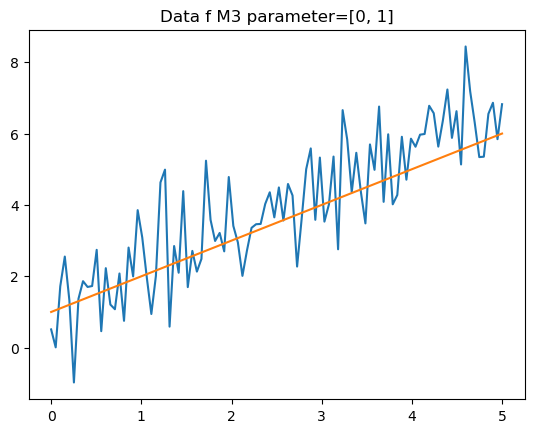

In [548]:

mk_f = handling_txts("regression_data_f.txt")
data_f_x, data_f_y, data_f_sigma_y = mk_f.rd_savetolist_abc()

mk_f_cal = Cal_sample_statistic(data_f_x)
x_sigma = mk_f_cal.StandardDeviation()

models = []
abc_list = []
for a in a_list:
    for b in b_list:
        model = model1(a, b, data_f_x)
        abc = [a, b]
        abc_list.append(abc)
        models.append(model)

#Chi_squared= []
chis = []
for model in models:
    sum = 0
    for j in range(len(models[0])):
        Chi_squared = (data_f_y[j]-model[j])**2/x_sigma**2
        sum = sum + Chi_squared

    chi_final = sum
    chis.append(chi_final)
    #print(sum)

import math

print(chis)
chis = [x for x in chis if math.isnan(x) == False]

Minimumvalueofchi2=min(chis)
index = chis.index(Minimumvalueofchi2)
fin_model = abc_list[index]
print(fin_model)

print(f"M1 a = {fin_model[0]}, b={fin_model[1]} , Minimum value of chi^2 = {Minimumvalueofchi2}")

plt.figure()
plt.plot(data_f_x, data_f_y, label="data")
plt.plot(data_f_x, models[index], label="model")
plt.title(f"Data f M3 parameter={fin_model}")
plt.show()

In [549]:
mk_h = handling_txts("regression_data_h.txt")
data_h_x, data_h_y, data_h_sigma_y = mk_h.rd_savetolist_abc()

mk_h_cal = Cal_sample_statistic(data_h_x)
x_sigma = mk_h_cal.StandardDeviation()

data_2 = np.loadtxt("./regression_data_h.txt")
#print(data_2)

In [550]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Define your model and data (you'll need to replace these with your actual data and models)
def model(a, b, x_list):
    # Define your model function using the parameters
    # This is where you'd put your model equations
    # Example: return params[0] * x + params[1]
    #a = float(a)
    #b = float(b)
    #x = float(x)
    
    results = []
    for x in x_list:
        val = a*x*(np.sin(b))+1
        results.append(val)
    
    return results

data_x = data_h_x  # Your x-values
data_y = data_h_y  # Your y-values
data_err = data_h_sigma_y  # Measurement errors

# params = [a, b]
params = [-2, -7]
a = params[0]
b = params[1]

# Define the chi-squared function
def chi_squared(y_data, mod, err):
    # Calculate the residuals
    chisq = 0
    for i in range(len(y_data)):
        temp1 = (y_data[i]-mod[i])**2
        temp2 = err[i]**2
        chisq = chisq + temp1/temp2
    return chisq

# Perform the fit to obtain best-fit parameters
#initial_guess = [initial_guess_values]  # Initial parameter guesses
#result = minimize(chi_squared, initial_guess, args=(data_x, data_y, data_err), method='Nelder-Mead')
best_fit_params = [-2, -7]

# Calculate the minimum chi-squared value
min_chi2 = 9.15472816928806

# Determine the degrees of freedom (N - p, where N is the number of data points and p is the number of fit parameters)
#degrees_of_freedom = len(data_x) - len(best_fit_params)
degrees_of_freedom = 2

# Set confidence levels
confidence_levels = [0.68, 0.95, 0.99]

# Calculate the chi-squared threshold values for the desired confidence levels
chi2_thresholds = chi2.ppf(confidence_levels, degrees_of_freedom)
print(chi2_thresholds)


[2.27886857 5.99146455 9.21034037]


In [551]:
n = 100
ranges = 0.1
best_fit_params = [-2, -7]
mod = model(best_fit_params[0], best_fit_params[1], data_x)
chisqval = np.zeros((n,n))
lwr = 1-ranges
hwr = 1 + ranges
samp1 = np.linspace(lwr*best_fit_params[0],hwr*best_fit_params[0],n)
samp2 = np.linspace(lwr*best_fit_params[1],hwr*best_fit_params[1],n)
for i in range(len(samp1)):
    for j in range(len(samp2)):
        chisqval[i,j] = chi_squared(data_y, model(samp1[i], samp2[j], data_x), data_err)

In [552]:
print(chisqval)

[[138507.7688653  133118.95572699 127840.90132781 ...  19895.25258205
   20240.98348208  20561.97205087]
 [138493.23818031 133092.74118377 127803.49522959 ...  20204.73521642
   20554.20550821  20878.64744877]
 [138478.7082684  133066.52926017 127766.0946891  ...  20516.86256181
   20870.08551901  21197.99307258]
 ...
 [137101.89187117 130588.34203775 124238.38657264 ...  62228.8426569
   62999.0966307   63712.05751299]
 [137087.43617472 130562.38159877 124201.51957384 ...  62794.86226087
   63570.14316963  64287.74482477]
 [137072.98125135 130536.42377941 124164.65813277 ...  63363.52657588
   64143.84769322  64866.10236246]]


In [553]:
#chisqdata = chis - min_chi2
chisqdata = []
for ch in chisqval:
    print(temp)
    temp = ch - temp.min()
    print(temp)
    chisqdata.append(temp)

[137134.261262   130597.70379006 124225.93814342 118019.97724625
 111980.70400661 106108.87142633 100405.1028141   94869.89210151
  89503.60426154  84306.47582901  79278.61552247  74420.00496675
  69730.4995156   65209.82917348  60857.59961556  56673.29330513
  52656.2707072   48805.77159723  45120.91646376  41600.70800371
  38244.03270889  35049.66254246  32016.25670365  29142.36347928
  26426.42218051  23866.76516292  21461.61992832  19209.11130644
  17107.26371444  15154.00349256  13347.16131357  11684.47466425
  10163.59039652   8782.06734618   7537.37901696   6426.91632757
   5447.99041952   4597.83552309   3873.61187932   3272.40871527
   2791.24727018   2427.08386992   2176.81304712   2037.27070447
   2005.23731824   2077.44117972   2250.56167145   2521.2325758
   2886.04541298   3341.55280562   3884.27186733   4510.6876121
   5217.25638197   6000.40928989   6856.55567505   7782.08656768
   8773.37816054   9826.79528406  10938.69488241  12105.42948745
  13323.35068781  14588.812

In [554]:
print(chisqdata)

[array([ 1.36502532e+05,  1.31113718e+05,  1.25835664e+05,  1.20669249e+05,
        1.15615267e+05,  1.10674423e+05,  1.05847338e+05,  1.01134544e+05,
        9.65364859e+04,  9.20535239e+04,  8.76859313e+04,  8.34338963e+04,
        7.92975217e+04,  7.52768264e+04,  7.13717453e+04,  6.75821300e+04,
        6.39077503e+04,  6.03482943e+04,  5.69033695e+04,  5.35725039e+04,
        5.03551470e+04,  4.72506708e+04,  4.42583708e+04,  4.13774676e+04,
        3.86071079e+04,  3.59463656e+04,  3.33942437e+04,  3.09496753e+04,
        2.86115252e+04,  2.63785915e+04,  2.42496069e+04,  2.22232409e+04,
        2.02981007e+04,  1.84727337e+04,  1.67456285e+04,  1.51152175e+04,
        1.35798779e+04,  1.21379344e+04,  1.07876605e+04,  9.52728063e+03,
        8.35497240e+03,  7.26886832e+03,  6.26705796e+03,  5.34759005e+03,
        4.50847455e+03,  3.74768483e+03,  3.06315980e+03,  2.45280610e+03,
        1.91450033e+03,  1.44609121e+03,  1.04540187e+03,  7.10232098e+02,
        4.38360563e+02, 

[-2, -7]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


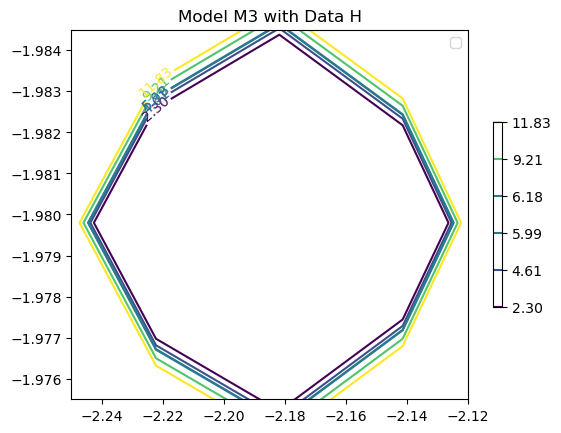

In [555]:
rng = 1
best_fit_params = [-2, -7]
print(best_fit_params)
lwr = 1- rng
hwr = 1 + rng
n = 100
prob_df_2=[2.3, 4.61, 5.99, 6.18, 9.21, 11.83]
samp1 = np.linspace(lwr*best_fit_params[0],hwr*best_fit_params[0],n)
samp2 = np.linspace(lwr*best_fit_params[1],hwr*best_fit_params[1],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()


CS =  ax.contour(X,Y,chisqdata,levels=prob_df_2)
# ax.clabel(CS,inline=True)
ax.set_xlim([-2.250,-2.120])
ax.set_ylim([-1.9755, -1.9845])
ax.set_title('Model M3 with Data H')
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()